# Breast Cancer Analysis and Prediction

<h2> Abstract </h2>

<p> The main focus of the project is to analyze the data collected in relation to breast cancer type in the female human body. It is largely categorized into malignant or benign. The data is analyzed and a suitable model is generated to further help in the prediction of the cancer type present in the female breast at even an early stage. </p>

<h2> Introduction </h2>

<p> Breast cancer is the most common invasive cancer in women and the second leading cause of cancer death in women after lung cancer. Advances in screening and treatment for breast cancer have improved survival rates dramatically since 1989. Early screening, leading to detection has, from statistics, led to the increase in survival rates. </p>

<p> To better understand the breast cancer, it helps to understand how any cancer can develop. </p>
<p> Cancer occurs as a result of mutations, or abnormal changes, in the genes responsible for regulating growth of cells and keeping them healthy. Normally the cells in our body replaces themselves through an orderly process of cell growth. However when this is not obtainable, the changed cells gains the ability to kee dividing without control or order, producing more cells just like it and forming tumour. </p>

<p> A tumour can be benign (not dangerous to health) or malignant (has potential to be dangerous). Benign tumours are not considered cancerous. Their cells are closed to normal in appearance, they grow slowly, and they do not invade nearby tissues or spread to other parts of the body. Malignant tumours are cencerous. Left unchekced, malignant cells eventually can spread beyond the original tumour to other parts of the body. </p>

<p> There is a possibility of detecting cancer at an early stage, based on features collected from the patients and th<e main goal of this analysis is to build a highly accurate model which will predict the exact type of breast cancer present in the observed patient </p> 

<p> The important features to be observed for each predictions are obtained from the cell nucleus. 
    <ul>
        <li> Radius  mean of distances from center to points on the perimeter </li>
        <li> Texture standard deviation of gray-scale values  </li>
        <li> Smoothness local variation in radius lengths </li>
        <li> Perimeter </li>
        <li> Area : The area of the cell nucleus 
         </li>
        <li> Compactness perimeter^2 / area - 1.0 </li> 
        <li> Concavity severity of concave portions of the contour </li>
        <li> Concave points number of concave portions of the </li>
        <li> Contour symmetry  </li>
        <li> Fractal dimension </li>







# Data Preparation and Analysis

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.drop(columns = 'Unnamed: 32', inplace=True)

A data summary is observed. However, the diagnosis will be encoded into 0 and 1 using label encoder

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
enc = LabelEncoder()
df['diagnosis'] = enc.fit_transform(df.iloc[:, 1])

The dataset contains about 10 original features. The remaining 20 features are the standard error and worst error of the original features. We can further perform visualization report on the mean features alone. 

<h3> seperating the features columns into mean value, standard error value and worst value </h3>

In [6]:
df_mean1 = []
for i, item in enumerate(df.columns):
    if i > 1 and i < 12:
        df_mean1.append(str(item))

In [7]:
df_se1 = []
for i, item in enumerate(df.columns):
    if i > 11 and i < 22:
        df_se1.append(str(item))

In [8]:
df_worst = []
for i, item in enumerate(df.columns):
    if i > 21:
        df_worst.append(str(item))

In [9]:
meanf  = df[df_mean1]
se_val = df[df_se1]
worst  = df[df_worst]

In [10]:
mean_val = list(meanf.columns)

In [11]:
#Creating a seperate dataframe for Malignant and Belign
dfM = df[df['diagnosis']==1]
dfB = df[df['diagnosis']==0]

# Stacked Barchart of Mean values of features

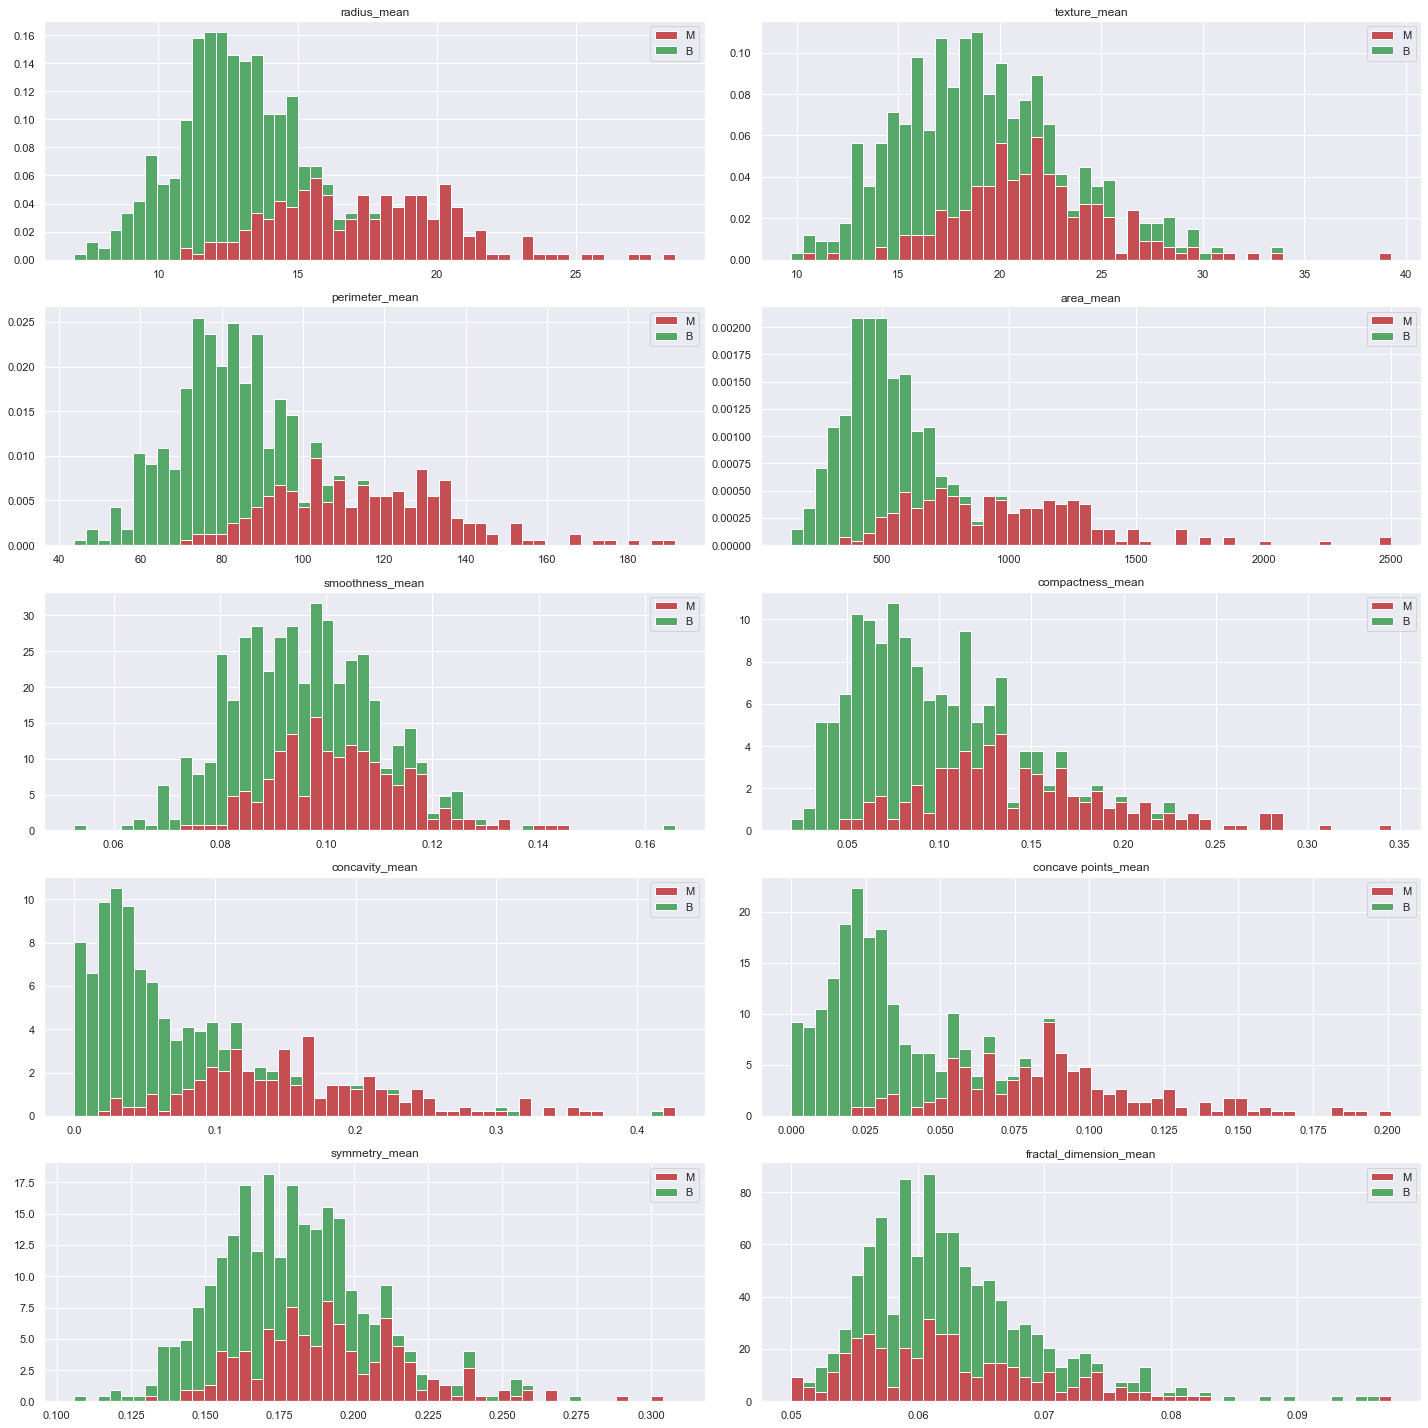

In [12]:
plt.figure(figsize=(20, 20))
sns.set(style='darkgrid')
count = 1
for i, item in enumerate(mean_val):
    plt.subplot(5, 2, count)
    count += 1
    width = (max(df[mean_val[i]]) - min(df[mean_val[i]])) / 50
    plt.hist([dfM[item],  dfB[item]],bins=np.arange(min(df[mean_val[i]]), max(df[mean_val[i]]) + width, width), stacked=True, label=['M', 'B'], normed=True, color=['r', 'g'])
    plt.legend(loc='upper right')
    plt.title(mean_val[i])
plt.tight_layout()
plt.show()

The charts above shows the distrubution of the predictors with respect to the target variable. 

Features like symmetry mean, fractal dimmension, smoothness mean and texture mean equally has weighted values in predicting the target variable. No clear definition which will predict the target variable. Hence, they can be excluded from our predictors. 


# Visualization of the Standard Error features

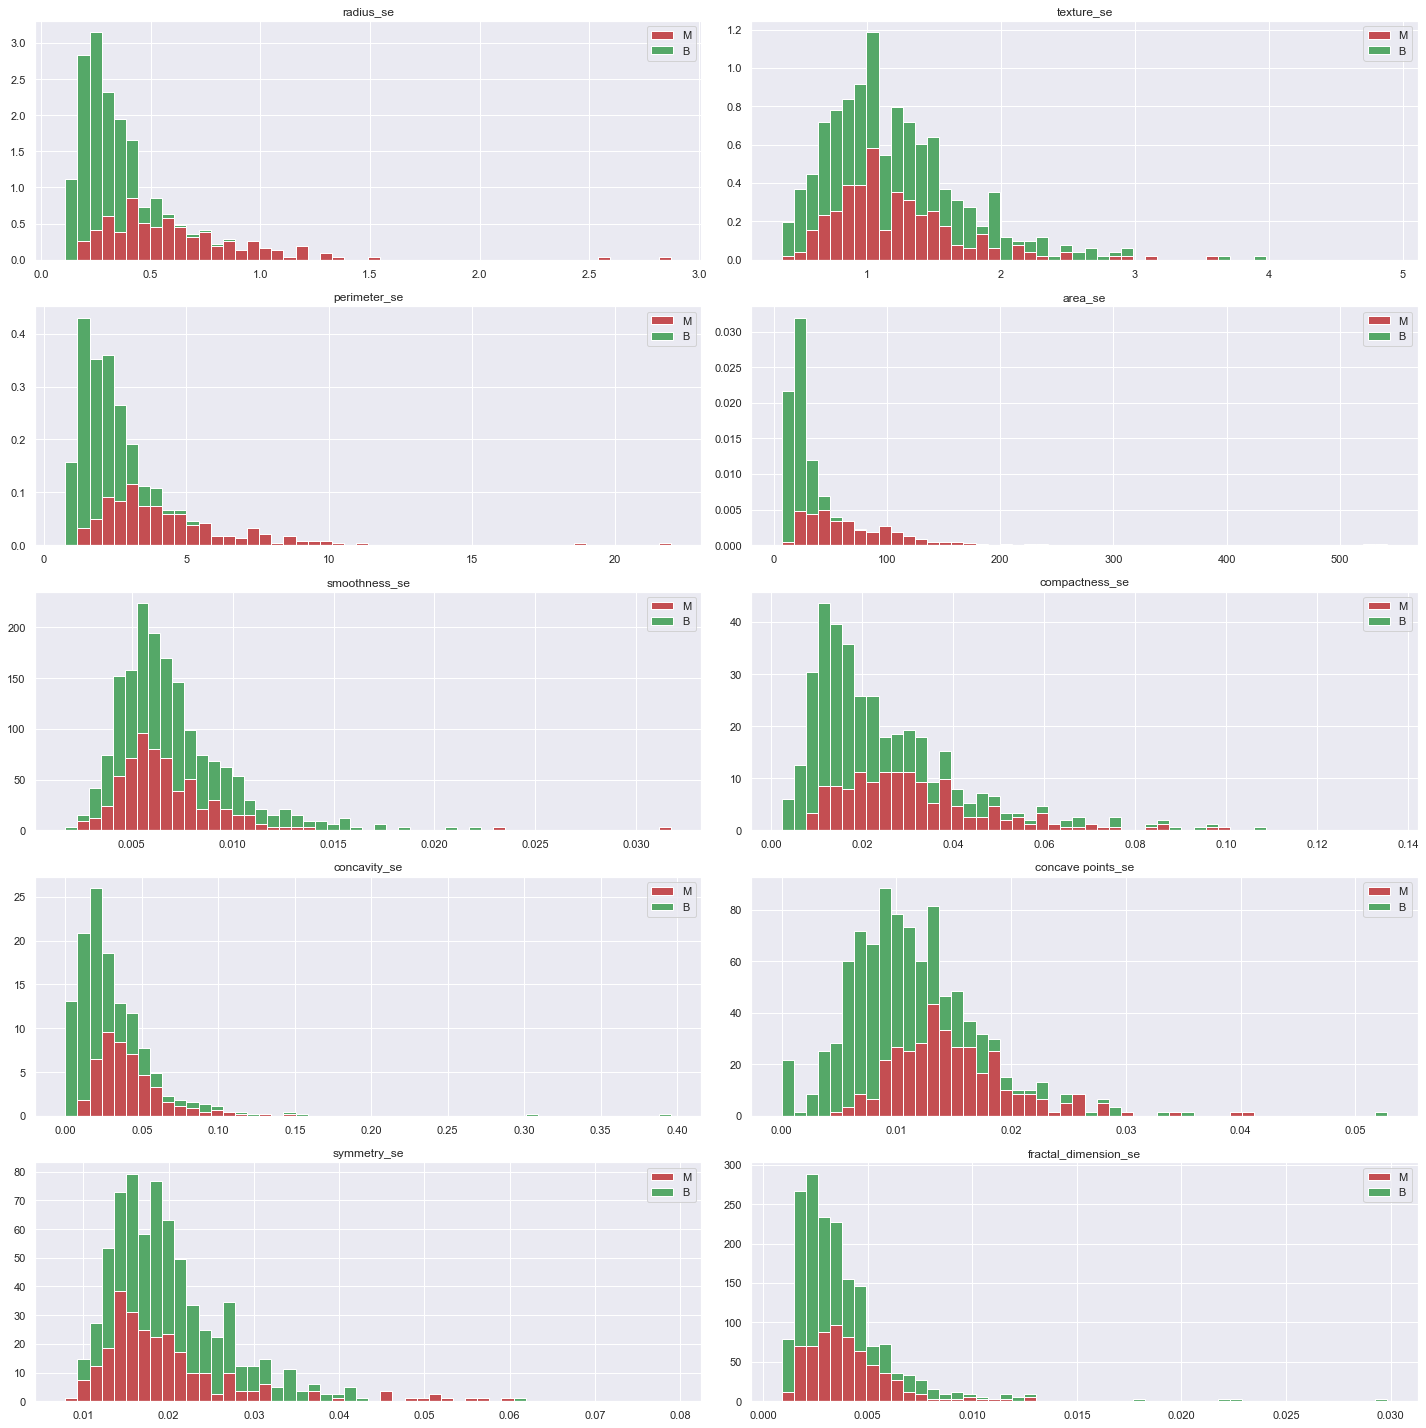

In [13]:
plt.figure(figsize=(20, 20))
sns.set(style='darkgrid')
count = 1
for i, item in enumerate(df_se1):
    plt.subplot(5, 2, count)
    count += 1
    width = (max(df[df_se1[i]]) - min(df[df_se1[i]])) / 50
    plt.hist([dfM[item],  dfB[item]],bins=np.arange(min(df[df_se1[i]]), max(df[df_se1[i]]) + width, width), stacked=True, label=['M', 'B'], normed=True, color=['r', 'g'])
    plt.legend(loc='upper right')
    plt.title(df_se1[i])
plt.tight_layout()
plt.show()

# Visualization of the Worst values of features

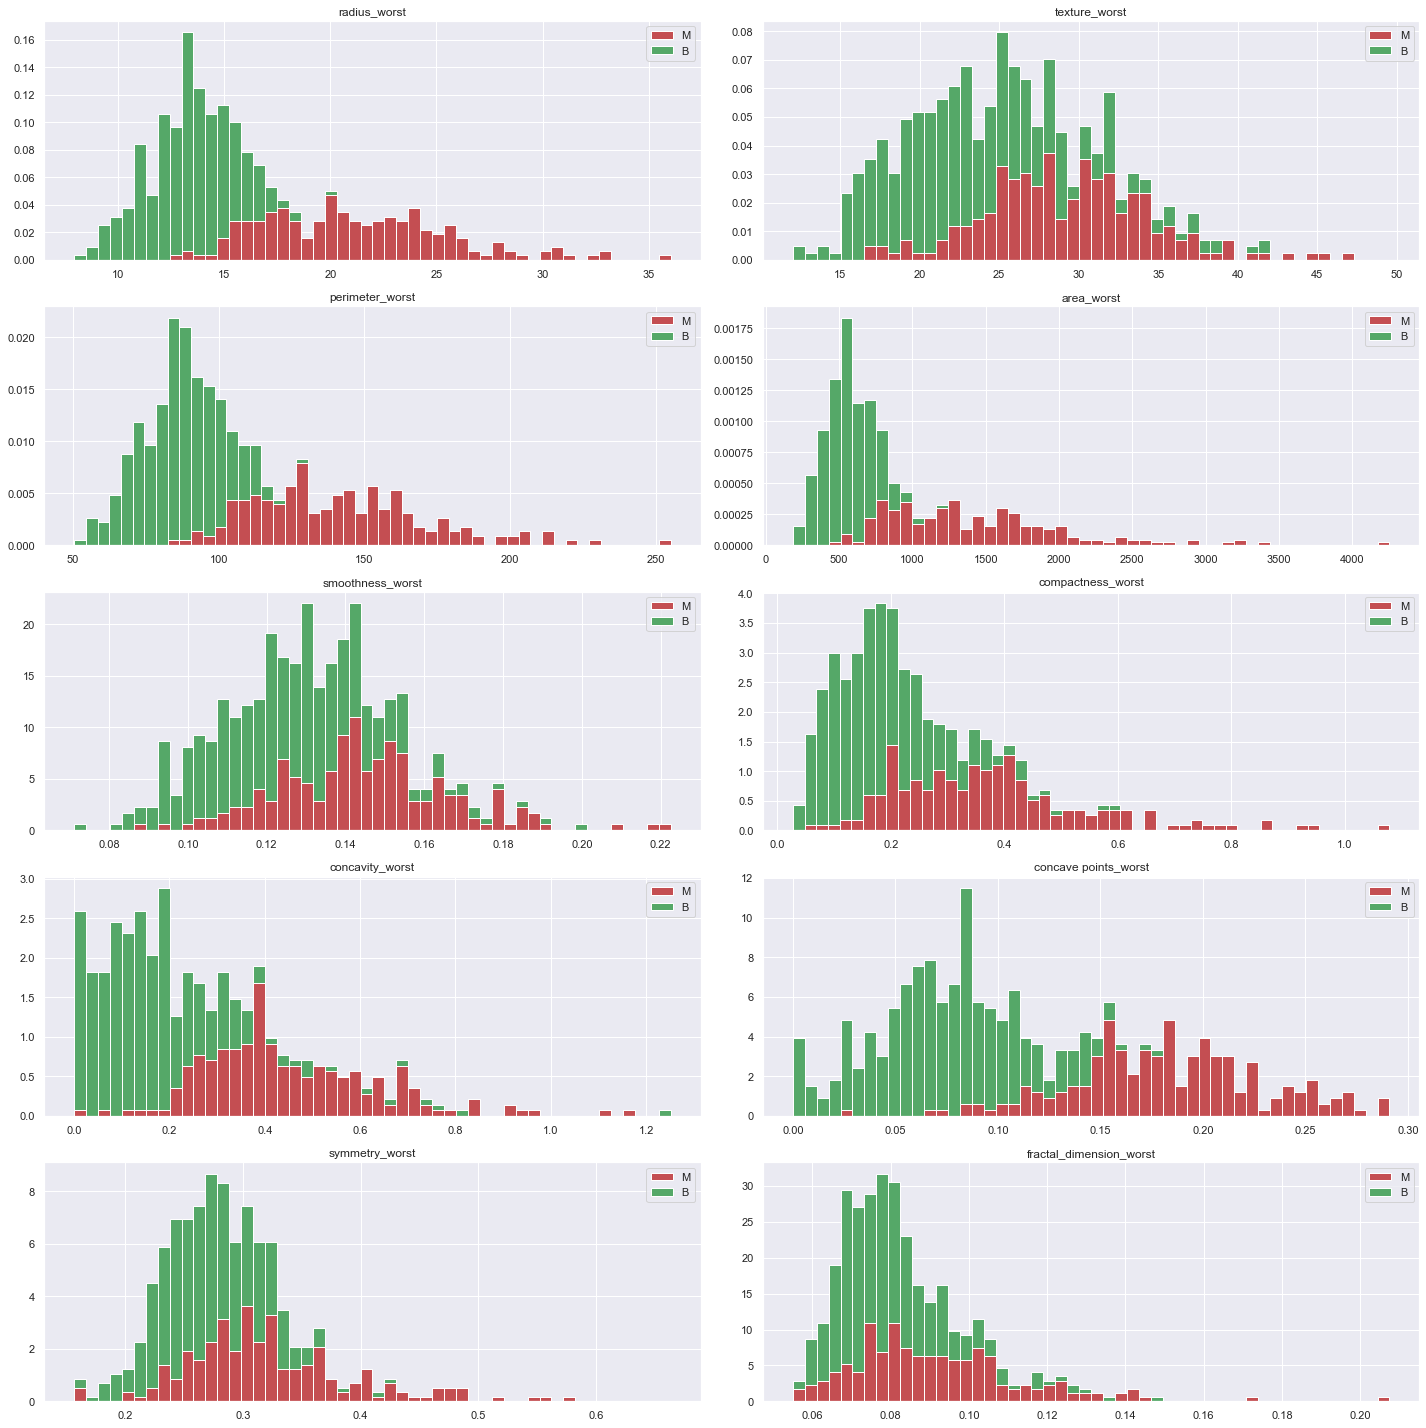

In [17]:
plt.figure(figsize=(20, 20))
sns.set(style='darkgrid')
count = 1
for i, item in enumerate(df_worst):
    plt.subplot(5, 2, count)
    count += 1
    width = (max(df[df_worst[i]]) - min(df[df_worst[i]])) / 50
    plt.hist([dfM[item],  dfB[item]],bins=np.arange(min(df[df_worst[i]]), max(df[df_worst[i]]) + width, width), stacked=True, label=['M', 'B'], normed=True, color=['r', 'g'])
    plt.legend(loc='upper right')
    plt.title(df_worst[i])
plt.tight_layout()
plt.show()

<h2> Data Summary </h2> 

In [18]:
id_ = ['id']
sum_fe = [x for x in df.columns if x not in id_]
summary = df[sum_fe].describe().transpose().reset_index()
summary = summary.rename(columns = {'index':'feature'})
np.around(summary, 3)


,feature,count,mean,std,min,25%,50%,75%,max
0,diagnosis,569.0,0.373,0.484,0.000,0.000,0.000,1.000,1.000
1,radius_mean,569.0,14.127,3.524,6.981,11.700,13.370,15.780,28.110
2,texture_mean,569.0,19.290,4.301,9.710,16.170,18.840,21.800,39.280
3,perimeter_mean,569.0,91.969,24.299,43.790,75.170,86.240,104.100,188.500
4,area_mean,569.0,654.889,351.914,143.500,420.300,551.100,782.700,2501.000
5,smoothness_mean,569.0,0.096,0.014,0.053,0.086,0.096,0.105,0.163
6,compactness_mean,569.0,0.104,0.053,0.019,0.065,0.093,0.130,0.345
7,concavity_mean,569.0,0.089,0.080,0.000,0.030,0.062,0.131,0.427
8,concave points_mean,569.0,0.049,0.039,0.000,0.020,0.034,0.074,0.201
9,symmetry_mean,569.0,0.181,0.027,0.106,0.162,0.179,0.196,0.304


# Correlation plot

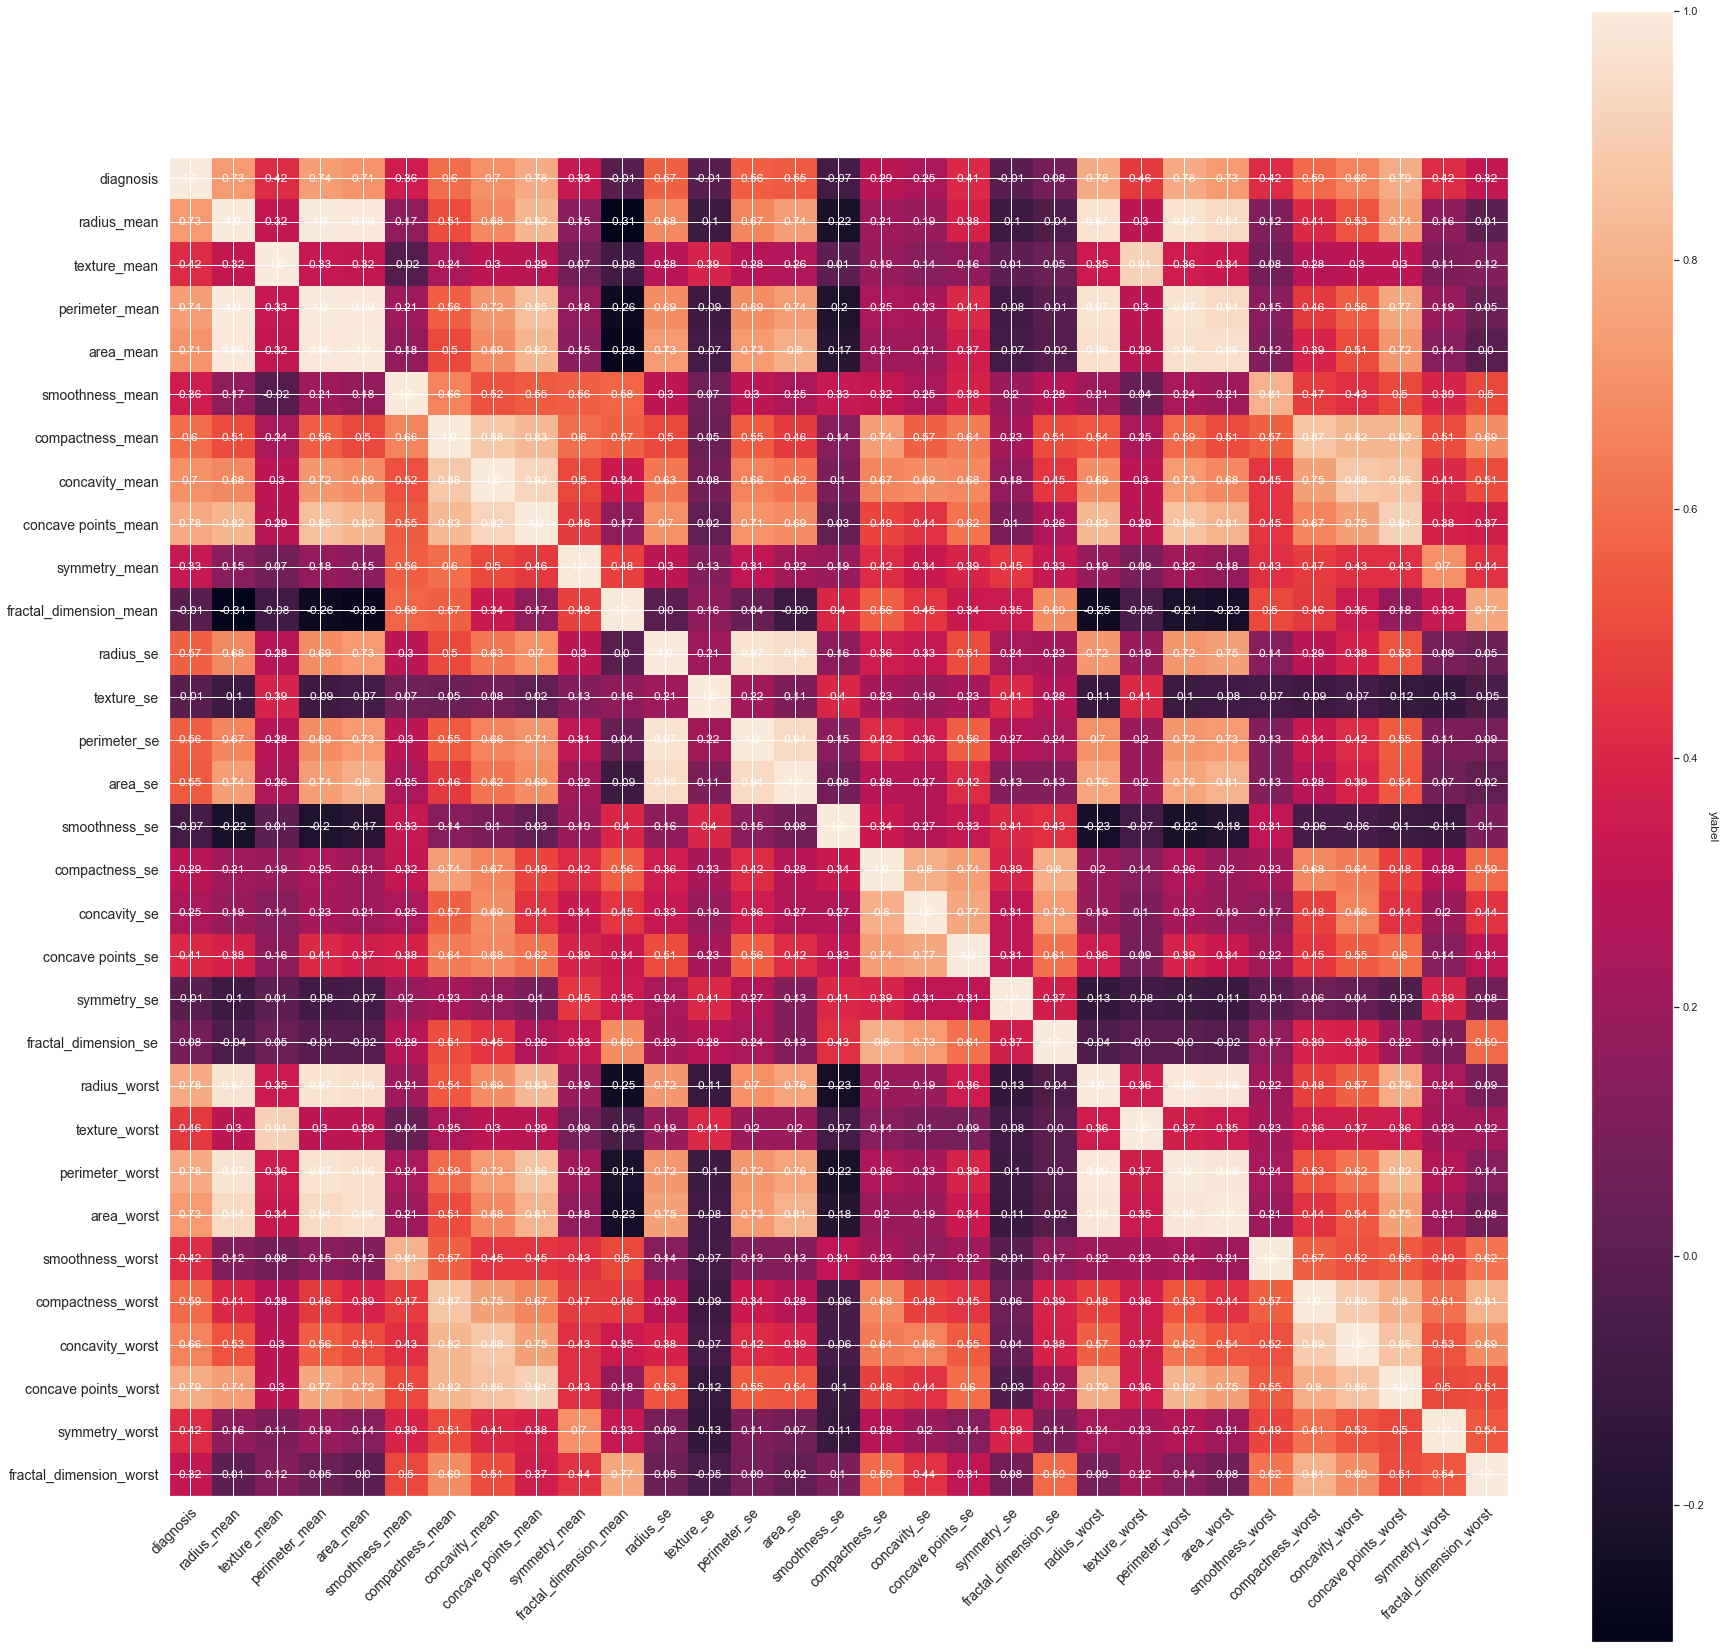

In [19]:
corre = df[sum_fe].corr()
lab_lis = df[sum_fe].columns.to_list()
data = np.array(corre)
data = np.around(data, 2)

fig, ax = plt.subplots(figsize=(30,30))
im = ax.imshow(data)

#Setting xtick labels 
ax.set_xticks(np.arange(len(lab_lis)))
ax.set_yticks(np.arange(len(lab_lis)))

#Setting the label with respective list of enteries
ax.set_xticklabels(lab_lis)
ax.set_yticklabels(lab_lis) 

#Reorientating xtick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor', fontsize=14 )
plt.setp(ax.get_yticklabels(), fontsize=14)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('ylabel', rotation=-90, va="bottom")
for i in range(len(lab_lis)):
    for j in range(len(lab_lis)):
        text = ax.text(j, i, data[i, j],
                      ha="center", va="center", color="w")     
plt.show()


# Model Development

<h1> Model Function </h1>

In [20]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from sklearn.svm import SVC

In [21]:
def cancerModelClassifier(X, y, r_s, mod, ls_cols, size, cf):
    #splitting train test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state=r_s)
    #fitting train dataset 
    mod.fit(X_train, y_train)
    #prediction
    ypred = mod.predict(X_test)

    if cf == 'coefficient':
        coefficients  = pd.DataFrame(mod.coef_.ravel())
    elif cf == 'importance':
        coefficients  = pd.DataFrame(mod.feature_importances_)
    
    coef_df = pd.DataFrame(ls_cols)
    coef_sumry    = (pd.merge(coefficients, coef_df, left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    print (mod)
    print ("\n Classification report : \n",classification_report(y_test,ypred))
    print ("Accuracy   Score : ",accuracy_score(y_test,ypred))
    print ("F1   Score : ", f1_score(y_test,ypred))
    plt.figure(figsize=(20,10))
    chart = sns.barplot(x=coef_sumry['features'], y=coef_sumry['coefficients'], palette='Set1')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()




<h1> Choosing the 6 best assumed parameters for training from the mean features </h1>

In [22]:
df_sel = df[df_mean1].iloc[:, [2, 4, 5, 7, 8, 9]]
df_sel_ls = list(df_sel.columns)

In [23]:
log_ = LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       104
           1       0.92      0.84      0.88        67

    accuracy                           0.91       171
   macro avg       0.91      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171

Accuracy   Score :  0.9064327485380117
F1   Score :  0.875


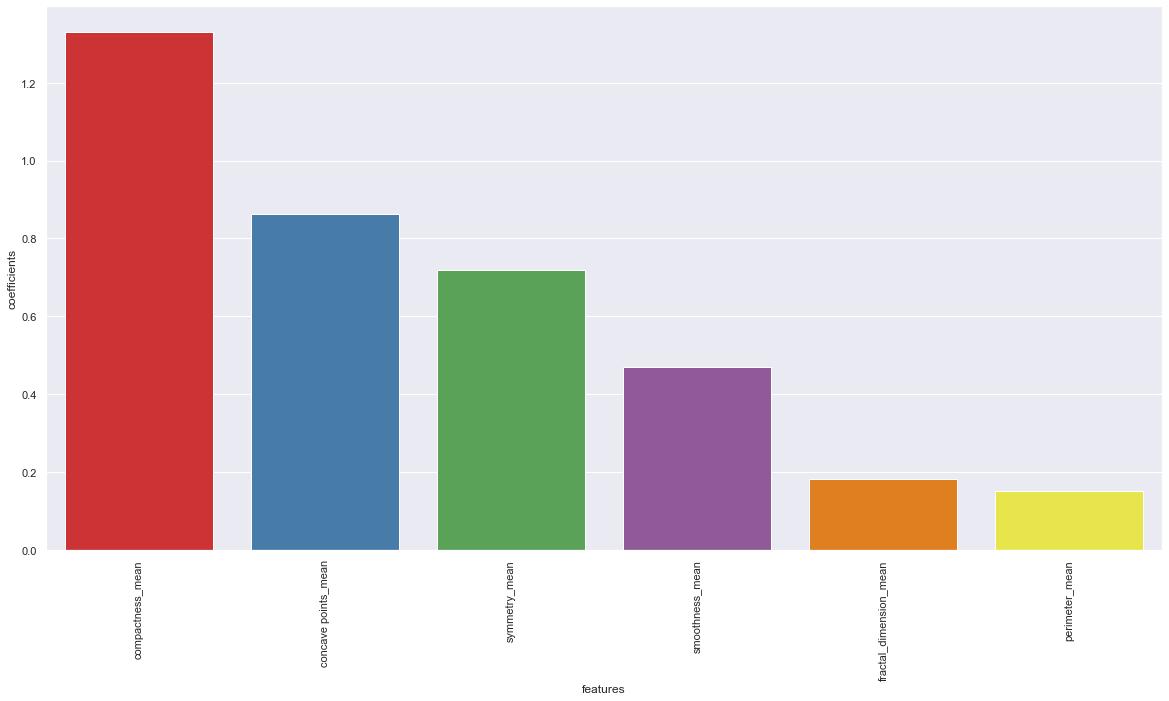

In [24]:
cancerModelClassifier(df_sel.values, df['diagnosis'].values, 194, log_, df_sel_ls, 0.3, 'coefficient')

In [25]:
rand_ = RandomForestClassifier(random_state=194)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=194,
                       verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       104
           1       0.97      0.94      0.95        67

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Accuracy   Score :  0.9649122807017544
F1   Score :  0.9545454545454547


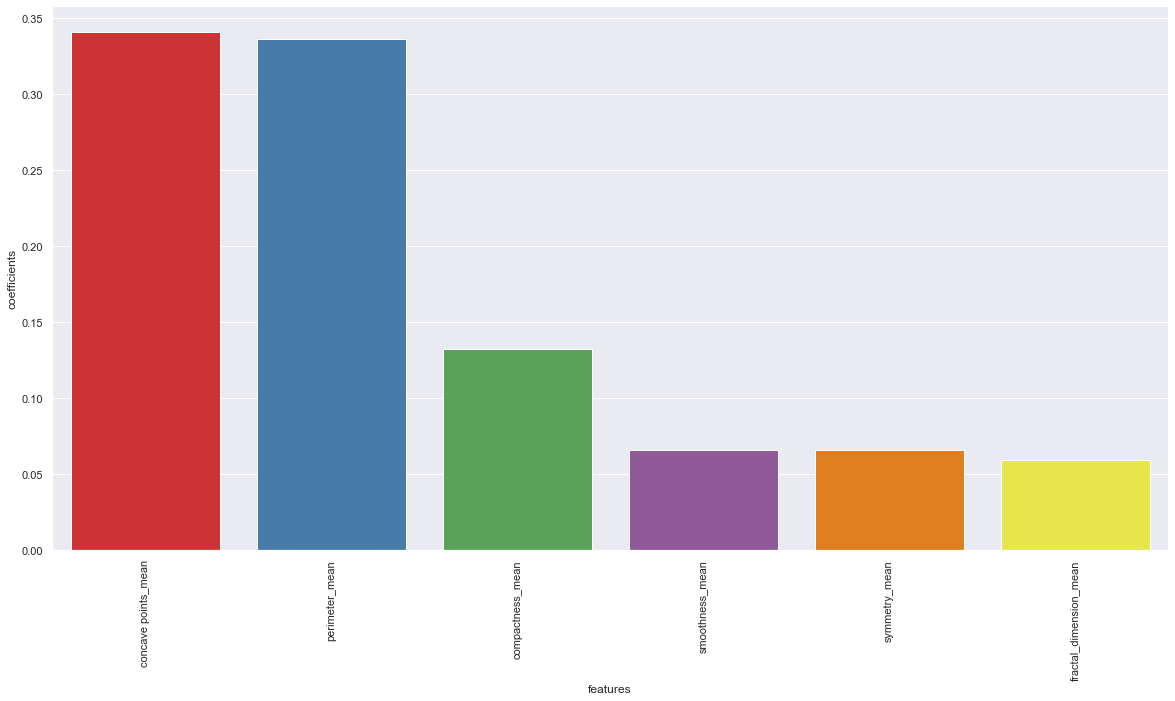

In [26]:
cancerModelClassifier(df_sel.values, df['diagnosis'].values, 194, rand_, df_sel_ls, 0.3, 'importance')

In [27]:
sv_ = SVC(kernel='linear', random_state=194)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=194, shrinking=True, tol=0.001,
    verbose=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       104
           1       0.97      0.84      0.90        67

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171

Accuracy   Score :  0.9239766081871345
F1   Score :  0.896


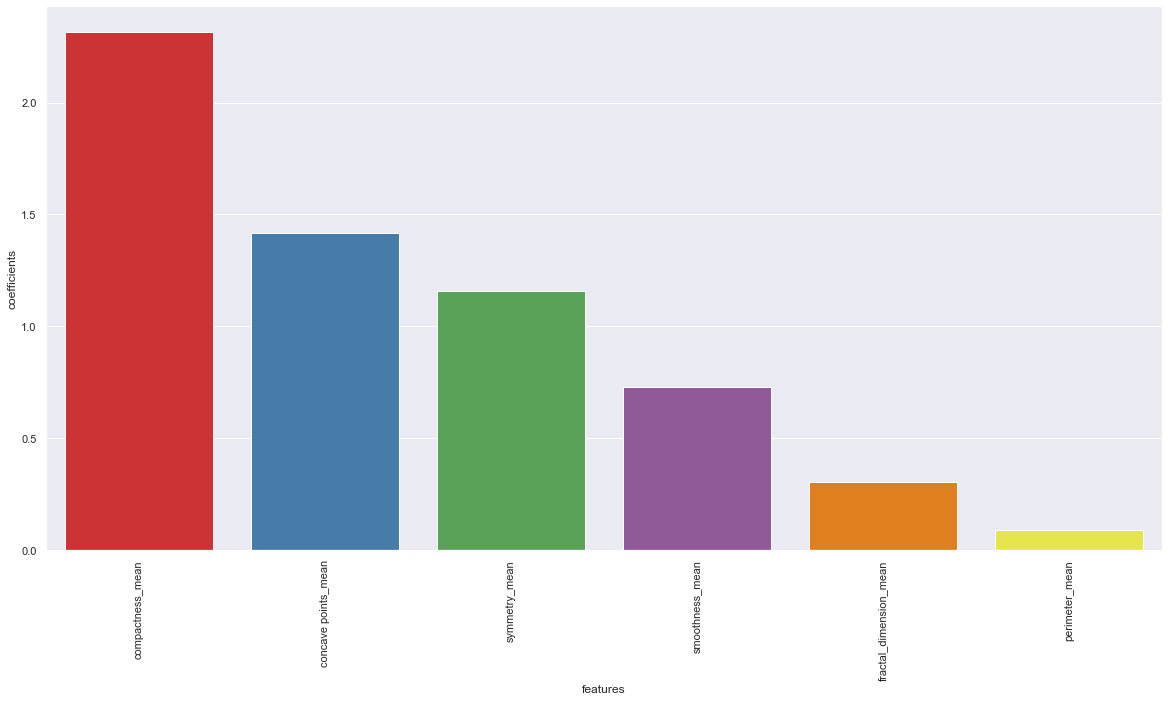

In [28]:
cancerModelClassifier(df_sel.values, df['diagnosis'].values, 194, sv_, df_sel_ls, 0.3, 'coefficient')

# Training with all features 

In [29]:
ls = list(df.iloc[:, 2:].columns)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=194,
                       verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       104
           1       0.98      0.94      0.96        67

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

Accuracy   Score :  0.9707602339181286
F1   Score :  0.9618320610687023


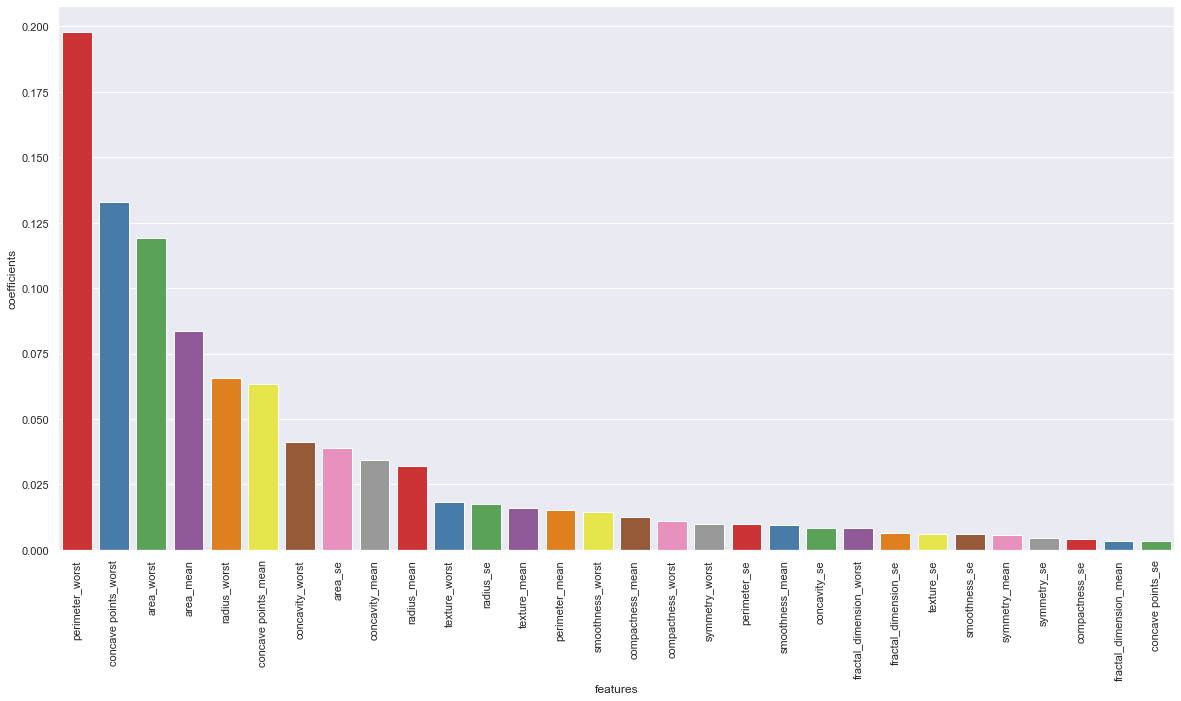

In [30]:
cancerModelClassifier(df.iloc[:, 2:].values, df.iloc[:, 1].values, 194, rand_, ls , 0.3, 'importance')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       104
           1       0.97      0.93      0.95        67

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Accuracy   Score :  0.9590643274853801
F1   Score :  0.9465648854961832


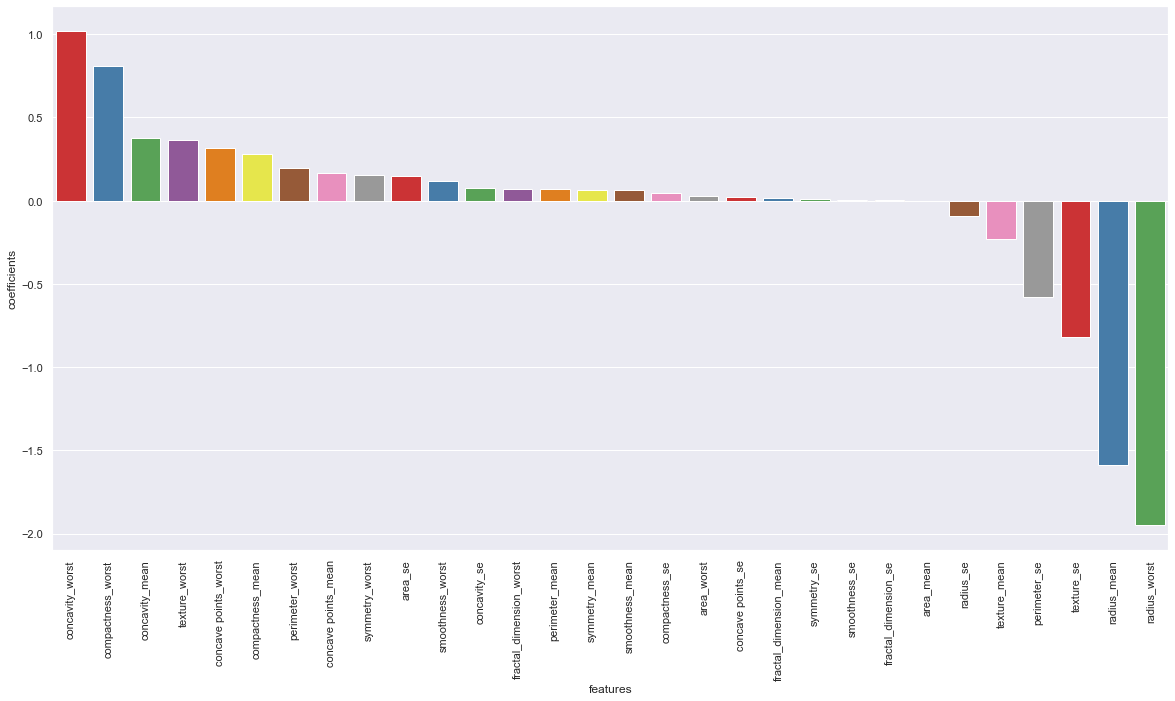

In [31]:
cancerModelClassifier(df.iloc[:, 2:].values, df.iloc[:, 1].values, 194, log_, ls , 0.3, 'coefficient')

# Conclusion

Having trained the model with 3 different classifier models, Random forest recorded the best f1 score and accuracy score. Having all the features trained showed a better accuracy than using just the mean values.